In [2]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 코랩에서 실행되는 노트북인가요?
IS_COLAB = "google.colab" in sys.modules

# 텐서플로 ≥2.0 필수
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("감지된 GPU가 없습니다. GPU가 없으면 CNN은 매우 느릴 수 있습니다.")
    if IS_COLAB:
        print("런타임 > 런타임 유형 변경 메뉴를 선택하고 하드웨어 가속기로 GPU를 고르세요.")

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)
tf.random.set_seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "cnn"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

4422102/4422102 [==============================] - 0s 0us/step


In [15]:
from functools import partial

from keras.regularizers import l2

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    keras.layers.BatchNormalization(),# 데이터 정규화 추가
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.GlobalAveragePooling2D(), # flatten 대신에 전역 평균 풀링층 사용
    keras.layers.Dense(units=128, activation='relu', kernel_regularizer=l2(0.01)), # 과적합 줄이기 위해 규제 추가
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu', kernel_regularizer=l2(0.01)), # 과적합 줄이기 위해 규제 추가
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])


In [16]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)
X_new = X_test[:10]
y_pred = model.predict(X_new)

Epoch 1/20
1719/1719 [==============================] - 21s 10ms/step - loss: 1.0174 - accuracy: 0.7124 - val_loss: 0.4984 - val_accuracy: 0.8592
Epoch 2/20
1719/1719 [==============================] - 17s 10ms/step - loss: 0.5266 - accuracy: 0.8528 - val_loss: 0.4171 - val_accuracy: 0.8762
Epoch 3/20
1719/1719 [==============================] - 17s 10ms/step - loss: 0.4481 - accuracy: 0.8778 - val_loss: 0.3748 - val_accuracy: 0.8916
Epoch 4/20
1719/1719 [==============================] - 17s 10ms/step - loss: 0.4074 - accuracy: 0.8906 - val_loss: 0.3458 - val_accuracy: 0.9002
Epoch 5/20
1719/1719 [==============================] - 18s 10ms/step - loss: 0.3711 - accuracy: 0.9023 - val_loss: 0.3376 - val_accuracy: 0.9052
Epoch 6/20
1719/1719 [==============================] - 17s 10ms/step - loss: 0.3457 - accuracy: 0.9084 - val_loss: 0.3376 - val_accuracy: 0.9068
Epoch 7/20
1719/1719 [==============================] - 17s 10ms/step - loss: 0.3232 - accuracy: 0.9175 - val_loss: 0.3302 -

In [17]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_3 (Bat  (None, 28, 28, 1)         4         
 chNormalization)                                                
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 conv2d_17 (Conv2D)          (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 7, 7, 128)        

In [18]:
model.evaluate(X_test, y_test)
print("Training Loss:", history.history['loss'][-1])
print("Training Accuracy:", history.history['accuracy'][-1])
print("Validation Loss:", history.history['val_loss'][-1])
print("Validation Accuracy:", history.history['val_accuracy'][-1])

313/313 [==============================] - 1s 4ms/step - loss: 0.4121 - accuracy: 0.9149
Training Loss: 0.1707400530576706
Training Accuracy: 0.969072699546814
Validation Loss: 0.4109172224998474
Validation Accuracy: 0.9151999950408936


그림 저장 keras_learning_curves_plot


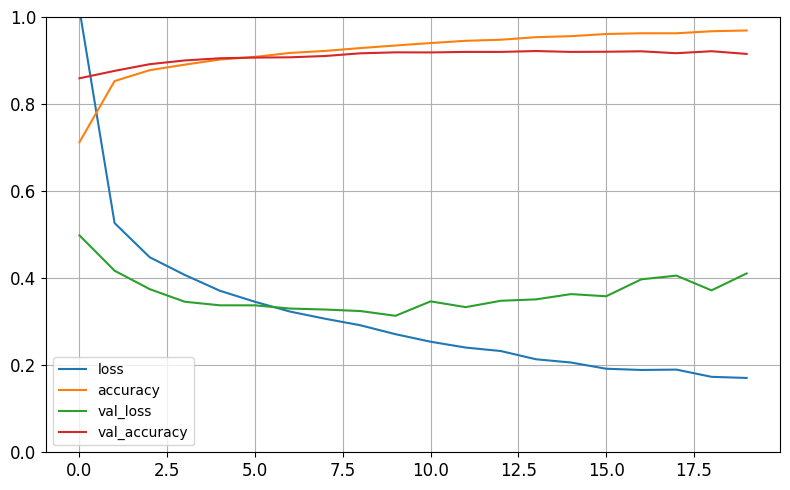

In [19]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
save_fig("keras_learning_curves_plot")
plt.show()